In [1]:
#Bibliotecas
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from pandas.plotting import scatter_matrix
from sklearn.metrics import matthews_corrcoef

In [2]:
#Base
base = pd.read_csv("C:/Users/012457631/Documents/Cursos_Resumos/FundamentosCiênciaDadosPython/dc-data.csv")
base.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0


In [3]:
#Emininar valores nulos
base =base.dropna()

In [4]:
#1)Em qual ano apareceram os personagens mais antigos e quantos personagens apareceram naquele ano?
base.groupby('YEAR')
por_ano=base.groupby('YEAR')
por_ano['APPEARANCES'].count()
#O ano mais antigo foi 1935 com somente 1 personagem

YEAR
1943.0    1
1959.0    1
1964.0    1
1976.0    1
1983.0    1
1984.0    3
1985.0    1
1986.0    2
1987.0    2
1988.0    1
1989.0    2
1992.0    1
1993.0    1
1994.0    2
1995.0    1
1996.0    1
1997.0    2
2002.0    1
2003.0    4
2004.0    1
2005.0    1
2006.0    4
2008.0    1
2009.0    2
Name: APPEARANCES, dtype: int64

In [5]:
#2)Forneça os números principais da estatística descritiva para o 
#campo que identifica a quantidade de aparições de uma personagem no formato:
#Média, Desvio Padrão, Mínimo, 25%, Mediana, 75%, Máximo.
base['APPEARANCES'].describe()

count     38.000000
mean      57.447368
std       82.207285
min        1.000000
25%        8.500000
50%       26.500000
75%       71.750000
max      371.000000
Name: APPEARANCES, dtype: float64

In [6]:
#2)Forneça os números principais da estatística descritiva para o 
#campo que identifica a quantidade de aparições de uma personagem no formato:
#Média, Desvio Padrão, Mínimo, 25%, Mediana, 75%, Máximo.
base.groupby('name')
por_nome=base.groupby('name')
por_nome['APPEARANCES'].describe()

,count,mean,std,min,25%,50%,75%,max
name,,,,,,,,
Achilles Warkiller (New Earth),1.0,17.0,NaN,17.0,17.0,17.0,17.0,17.0
Alexander Burgess (New Earth),1.0,4.0,NaN,4.0,4.0,4.0,4.0,4.0
Anissa Pierce (New Earth),1.0,92.0,NaN,92.0,92.0,92.0,92.0,92.0
Big Thunder (New Earth),1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0
Courtney Mason (New Earth),1.0,34.0,NaN,34.0,34.0,34.0,34.0,34.0
Daria Hernandez (New Earth),1.0,10.0,NaN,10.0,10.0,10.0,10.0,10.0
Fauna Faust (New Earth),1.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0
Frostbite (New Earth),1.0,17.0,NaN,17.0,17.0,17.0,17.0,17.0
Gerri Brauer (Dakotaverse),1.0,32.0,NaN,32.0,32.0,32.0,32.0,32.0


In [7]:
base['name'].nunique()

38

In [8]:
#Em nossa base cada personagem aparece somente uma vez, por isso os valores das estatísticas descritivas estão iguais
#e não é possível calcular o desvio padrão
base['name'].value_counts()

Syonide II (New Earth)            1
Ramsey Robinson (New Earth)       1
Mortimer Drake (New Earth)        1
Mikaal Tomas (New Earth)          1
Anissa Pierce (New Earth)         1
Io (New Earth)                    1
Fauna Faust (New Earth)           1
Alexander Burgess (New Earth)     1
Liana Kerzner (New Earth)         1
John Constantine (New Earth)      1
Gerri Brauer (Dakotaverse)        1
Joshua Barbazon (New Earth)       1
Todd Rice (New Earth)             1
Kevin Mayer (New Earth)           1
Frostbite (New Earth)             1
Josiah Power (New Earth)          1
Hero Cruz (New Earth)             1
Katherine Kane (New Earth)        1
Renee Montoya (New Earth)         1
Mallah (New Earth)                1
Scandal Savage (New Earth)        1
Hugh Dawkins (New Earth)          1
Hartley Rathaway (New Earth)      1
Henry Cannon (New Earth)          1
Big Thunder (New Earth)           1
Grace Choi (New Earth)            1
Marschall Saber (New Earth)       1
Karen Lou Faulkner (New Eart

In [9]:
#3)Qual a diferença entre o número de aparições entre heróis/heroínas e vilões/vilãs?
#A diferença de aparições entres heróis/heroínas e vilões/vilãs é de 1558.0
tipo_perso = base[['APPEARANCES', 'ALIGN']]
#valores unicos do tipo de personagem
personagem = pd.unique(tipo_perso.ALIGN.values)
print(personagem)

['Good Characters' 'Bad Characters' 'Neutral Characters']


In [10]:
#Cria um dicionário
#Gera uma lista pra cada tipo de personagem
base_tipo_perso = {tp:tipo_perso['APPEARANCES'][tipo_perso.ALIGN == tp] for tp in personagem}

In [11]:
base_tipo_perso['Good Characters'].sum()
base_tipo_perso['Bad Characters'].sum()
total_heroi=base_tipo_perso['Good Characters'].sum()
total_vilao=base_tipo_perso['Bad Characters'].sum()
dif=total_heroi-total_vilao
dif

1558.0

In [12]:
#4)Em que ano apareceu o primeiro personagem bissexual? Quantas vezes esse personagem apareceu no total?
base['GSM'].unique()

array(['Bisexual Characters', 'Homosexual Characters'], dtype=object)

In [13]:
bis = base[base["GSM"] == "Bisexual Characters"]["YEAR"]
bis

48      1984.0
292     2003.0
555     1994.0
750     1986.0
824     1993.0
886     1943.0
1490    1997.0
Name: YEAR, dtype: float64

In [14]:
#Mortimer Drake (New Earth) foi o primeiro bissexual, sua primeira aparição foi em 1943 e ele apareceu 32 vezes
newdf = base[(base["GSM"] == "Bisexual Characters") & (base['YEAR']==1943)]
newdf.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
886,19048,Mortimer Drake (New Earth),\/wiki\/Mortimer_Drake_(New_Earth),Secret Identity,Bad Characters,Brown Eyes,Brown Hair,Male Characters,Bisexual Characters,Living Characters,32.0,"1943, November",1943.0


In [15]:
#5)Qual o valor da obliquidade da variável com o número de aparições de cada personagem? Ignore as casas decimais.
aparicao=base["APPEARANCES"]
aparicao.skew(axis=0, skipna=True)
#A uma assimetria positiva

2.5212000213160275

In [16]:
#6)Qual o valor da curtose da variável com o número de aparições de cada personagem? Ignore as casas decimais.
aparicao.kurtosis(axis=0, skipna=True)

6.737358330182506

In [17]:
#7)Com base nas informações sobre a distribuição da variável
#sobre aparições das personagens, como você classifica essa distribuição?
aparicao.describe()
#A média e a mediana estão muito distantes, provavelmente não é uma distribuição normal

count     38.000000
mean      57.447368
std       82.207285
min        1.000000
25%        8.500000
50%       26.500000
75%       71.750000
max      371.000000
Name: APPEARANCES, dtype: float64

In [35]:
media = aparicao.mean()
devpd = aparicao.std()
min = aparicao.min()
max = aparicao.max()
n = aparicao.count()

distr_aparicao = stats.norm(media, devpd)

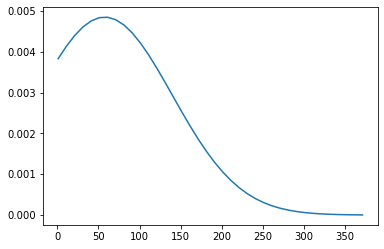

In [19]:
x = np.linspace(min, max, n)
y = distr_aparicao.pdf(x)
plt.plot(x, y)
#Como já era suspeito, a distribuição não é normal e há uma assimetria positiva 

#b) Distribuição assimétrica á esquerda, com valores extremos além de 3 desvios padrões da média

In [20]:
#8)Você deseja testar a hipótese que há uma tendência maior em reportar mulheres como heroínas do que homens como vilões. 
#Para isso, você quer testar se há de fato uma diferença significativa entre mulheres heroínas e homens vilões. 
#Que tipo de teste é o mais adequado?

#Como são variáveis categóricas, o testes mais adequado é o Chi Quadrado

In [21]:
#9)Você deseja testar a hipótese que há uma tendência maior em reportar mulheres como heroínas do que homens como vilões.
#Para isso, você quer testar se há de fato uma diferença significativa entre mulheres heroínas e homens vilões.
#Baseado em um nível de confiança de 5%, utilize o teste mais adequado e responda:

#a) Qual o valor da estatística do teste (valor de Z ou T ou X2 ou F)?

import scipy.stats
from scipy.stats import chi2
from scipy.stats import chi2_contingency
basetesteCHI = base[['SEX', 'ALIGN']]
#Verificar as frequências
scipy.stats.chisquare(basetesteCHI['SEX'].value_counts())
scipy.stats.chisquare(basetesteCHI['ALIGN'].value_counts())

Power_divergenceResult(statistic=19.94736842105263, pvalue=4.661052376199752e-05)

In [22]:
freq_table = pd.crosstab(basetesteCHI['SEX'], basetesteCHI['ALIGN'])
print(freq_table)

ALIGN              Bad Characters  Good Characters  Neutral Characters
SEX                                                                   
Female Characters               5               10                   3
Male Characters                 5               15                   0


In [43]:
chi2stat, p, dof, freq_exp = chi2_contingency(freq_table)
chi2stat
#O valor da estatística é 3,905

3.905555555555556

In [23]:
#b) Qual o valor de p?
p

#O valor de p é de 0,1418

0.1418794142211026

In [45]:
#c) A hipótese nula é rejeitada em favor da hipótese alternativa?
prob = 0.95
valor_critico = chi2.ppf(prob, dof)
print(valor_critico)

if abs(chi2stat) >= valor_critico:
	print('Sexo influenciou em ser herói/vilão(Rejeitar H0)')
else:
	print('Sexo NÃO influenciou em ser herói/vilão (Não conseguimos rejeitar H0)')

#O P-valor encontrado é superior ao alfa de 0,05, logo a um nível de confiança de 5%, não foram encontradas evidencias para
#rejeitar a hipótese nula

5.991464547107979
Sexo NÃO influenciou em ser herói/vilão (Não conseguimos rejeitar H0)


In [25]:
#10)Para esta questão, considere apenas personagens bons (Good Characters) e maus (Bad Characters) e 
#identidades públicas (Public Identity) e secretas (Secret Identity). Responda:
#a)  Qual o Coeficiente de Matthews entre Personagens Bons e Identidades Públicas?
Bons = base['ALIGN']=="Good Characters"
Secreto = base['ID']=="Public Identity"
matthews_corrcoef(Bons, Secreto)

0.20577736110739284

In [26]:
#b) Qual o Coeficiente de Matthews entre Personagens Maus e Identidades Secretas?
Maus = base['ALIGN']=="Bad Characters"
Secreto2 = base['ID']=="Secret Identity"
matthews_corrcoef(Maus, Secreto2)

0.3325458384852794

In [27]:
#c)c) Existe uma forte associação entre o alinhamento da personagem e o tipo de sua identidade? 
#Qual o coeficiente de Matthews?
matthews_corrcoef(base['ALIGN'], base['ID'])

0.0

In [34]:
#11)Quantos desvios padrões está da média uma personagem com 360 aparições? Use até duas casas decimais em sua resposta.

#Como vimos a média equivale a 57.447368
#E o Desvio padrão 82.207285

qtd_desv=(360-media)/devpd
qtd_desv


3.6803627785048887

In [29]:
#12)Para esta questão, considere apenas personagens maus (Bad Characters) e identidades públicas (Public Identity) 
#e secretas (Secret Identity). Teste a hipótese de que personagens maus tendem a ser mais do tipo que possuem 
#uma identidade secreta ao invés de uma identidade pública. Responda:
#a) Qual o tipo de teste mais adequado para testar essa hipótese?

#O teste mais adequado é o teste F


In [41]:
#b) Qual o valor da estatística do teste (valor de Z ou T ou X2 ou F)?

base['Maus']=Maus
df_anova = base[['Maus', 'ID']]
ident = pd.unique(df_anova.ID.values)
print(ident)
f1_df = {id:df_anova['Maus'][df_anova.ID == id] for id in ident}
F, p = stats.f_oneway(f1_df['Public Identity'], f1_df['Secret Identity'])

print("O valor de F é: ", F)


['Public Identity' 'Secret Identity']
O valor de F é:  4.476122185572923


In [42]:
#c) A hipótese nula é rejeitada em favor da hipótese alternativa?
if p<0.05:
    print("Rejeita H0")
else:
    print("Falha em rejeitar H0")

Rejeita H0
